In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
pd.pandas.set_option('display.max_columns',None)

Reading json file

In [84]:
df=pd.read_json('train.json')

Converting json to csv

In [85]:
import json
import csv

def convert_json_to_csv(json_file_path, csv_file_path):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)
        
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        # Write the header
        header = [
            'ID', 'tweet', 'domain',
            'profile_id', 'profile_id_str', 'profile_name', 'screen_name', 'location', 'profile_location',
            'description', 'url', 'entities', 'protected', 'url', 'friends_count', 'listed_count',
            'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
            'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color',
            'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile',
            'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color',
            'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile',
            'default_profile', 'default_profile_image','neighbor_follower','neighbor_following','label'
        ]
        csv_writer.writerow(header)
        
        # Write the data
        for item in data:
            profile = item.get('profile', {})
            neighbor = item.get('neighbor', {})
            
            neighbor_following = neighbor.get('following', []) if neighbor else []
            neighbor_follower = neighbor.get('follower', []) if neighbor else []
            
            row = [
                item.get('ID', ''),
                json.dumps(item.get('tweet', '')),
                json.dumps(item.get('domain', '')),
                profile.get('id', ''),
                profile.get('id_str', ''),
                profile.get('name', ''),
                profile.get('screen_name', ''),
                profile.get('location', ''),
                json.dumps(profile.get('profile_location', {})),
                profile.get('description', ''),
                profile.get('url', ''),
                json.dumps(profile.get('entities', {})),
                profile.get('protected', ''),
                profile.get('followers_count', ''),
                profile.get('friends_count', ''),
                profile.get('listed_count', ''),
                profile.get('created_at', ''),
                profile.get('favourites_count', ''),
                profile.get('utc_offset', ''),
                profile.get('time_zone', ''),
                profile.get('geo_enabled', ''),
                profile.get('verified', ''),
                profile.get('statuses_count', ''),
                profile.get('lang', ''),
                profile.get('contributors_enabled', ''),
                profile.get('is_translator', ''),
                profile.get('is_translation_enabled', ''),
                profile.get('profile_background_color', ''),
                profile.get('profile_background_image_url', ''),
                profile.get('profile_background_image_url_https', ''),
                profile.get('profile_background_tile', ''),
                profile.get('profile_image_url', ''),
                profile.get('profile_image_url_https', ''),
                profile.get('profile_link_color', ''),
                profile.get('profile_sidebar_border_color', ''),
                profile.get('profile_sidebar_fill_color', ''),
                profile.get('profile_text_color', ''),
                profile.get('profile_use_background_image', ''),
                profile.get('has_extended_profile', ''),
                profile.get('default_profile', ''),
                profile.get('default_profile_image', ''),
                json.dumps(neighbor_following),  # Convert following list to JSON string
                json.dumps(neighbor_follower),   # Convert follower list to JSON string
                item.get('label', '')
            ]
            csv_writer.writerow(row)
# Example usage
json_file_path = 'train.json'
csv_file_path = 'output.csv'
convert_json_to_csv(json_file_path, csv_file_path)


In [86]:
df = pd.read_csv('output.csv', encoding='utf-8')
df

,ID,tweet,domain,profile_id,profile_id_str,profile_name,screen_name,location,profile_location,description,url,entities,protected,url.1,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,neighbor_follower,neighbor_following,label
0,17461978,"[""RT @CarnivalCruise: \ud83c\udf89 Are you rea...","[""Politics"", ""Business"", ""Entertainment""]",17461978,17461978,SHAQ,SHAQ,"Orlando, FL","""{'id': '55b4f9e5c516e0b6', 'url': 'https://ap...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,"""{'url': {'urls': [{'url': 'https://t.co/7hsiK...",False,15349596,692,45568,Tue Nov 18 10:27:25 +0000 2008,142,None,None,True,True,9798,None,False,False,False,080203,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg....,False,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False,[],[],0
1,1297437077403885568,NaN,"[""Politics""]",1297437077403885568,1297437077403885568,Jennifer Fishpaw,JenniferFishpaw,,"""None """,,None,"""{'description': {'urls': []}} """,False,0,44,0,Sun Aug 23 07:35:11 +0000 2020,7,None,None,False,False,0,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1297437406...,https://pbs.twimg.com/profile_images/129743740...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,"[""170861207"", ""23970102"", ""47293791"", ""2945807...",[],1
2,17685258,"[""RT @realDonaldTrump: THANK YOU #RNC2020! htt...","[""Politics"", ""Entertainment"", ""Sports""]",17685258,17685258,Brad Parscale,parscale,Florida,"""None """,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,"""{'url': {'urls': [{'url': 'https://t.co/GooZc...",False,762839,475,3201,Thu Nov 27 18:47:32 +0000 2008,953,None,None,True,True,5518,None,False,False,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg....,False,http://pbs.twimg.com/profile_images/1295453225...,https://pbs.twimg.com/profile_images/129545322...,AB2316,FFFFFF,FFFFFF,666666,False,False,False,False,"[""46464108"", ""21536398"", ""18643437"", ""58949002...","[""1275068515666386945"", ""2535843469"", ""1293657...",0
3,15750898,"[""A family fears they may have been cheated ou...","[""Politics""]",15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL","""None """,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,"""{'url': {'urls': [{'url': 'https://t.co/RtP9Q...",False,327587,4801,1744,Wed Aug 06 15:12:10 +0000 2008,2946,None,None,True,True,192876,None,False,False,False,00064A,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg....,False,http://pbs.twimg.com/profile_images/1293193013...,https://pbs.twimg.com/profile_images/129319301...,0B2F8A,FFFFFF,E8EEF0,333333,True,False,False,False,"[""2324715174"", ""24030137"", ""2336676015"", ""1926...","[""855194021458739200"", ""1267566832598290432"", ...",0
4,1659167666,"[""RT @VonteThePlug: Yeah but he ain\u2019t got...","[""Politics""]",1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","""{'id': '5e281c17a74c170f', 'url': 'https://ap...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,"""{'url': {'urls': [{'url': 'https://t.co/5cY8G...",False,13324,647,44,Sat Aug 10 03:25:35 +0000 2013,729,None,None,False,False,103,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/t

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  8278 non-null   int64 
 1   tweet                               8223 non-null   object
 2   domain                              8278 non-null   object
 3   profile_id                          8278 non-null   int64 
 4   profile_id_str                      8278 non-null   int64 
 5   profile_name                        8278 non-null   object
 6   screen_name                         8278 non-null   object
 7   location                            8278 non-null   object
 8   profile_location                    8278 non-null   object
 9   description                         8278 non-null   object
 10  url                                 8278 non-null   object
 11  entities                            8278 non-null   obje

In [88]:
df.nunique()

ID                                    8278
tweet                                 8223
domain                                  15
profile_id                            8278
profile_id_str                        8278
profile_name                          8213
screen_name                           8278
location                              3133
profile_location                       419
description                           7193
url                                   4001
entities                              4146
protected                                2
url.1                                 5260
friends_count                         3527
listed_count                          1882
created_at                            8277
favourites_count                      4952
utc_offset                               1
time_zone                                1
geo_enabled                              2
verified                                 2
statuses_count                        5745
lang       

Finding missing values

In [89]:
df.isnull().sum()

ID                                     0
tweet                                 55
domain                                 0
profile_id                             0
profile_id_str                         0
profile_name                           0
screen_name                            0
location                               0
profile_location                       0
description                            0
url                                    0
entities                               0
protected                              0
url.1                                  0
friends_count                          0
listed_count                           0
created_at                             0
favourites_count                       0
utc_offset                             0
time_zone                              0
geo_enabled                            0
verified                               0
statuses_count                         0
lang                                   0
contributors_ena

In [90]:
(df.isnull().sum()/(len(df)))*100

ID                                    0.000000
tweet                                 0.664412
domain                                0.000000
profile_id                            0.000000
profile_id_str                        0.000000
profile_name                          0.000000
screen_name                           0.000000
location                              0.000000
profile_location                      0.000000
description                           0.000000
url                                   0.000000
entities                              0.000000
protected                             0.000000
url.1                                 0.000000
friends_count                         0.000000
listed_count                          0.000000
created_at                            0.000000
favourites_count                      0.000000
utc_offset                            0.000000
time_zone                             0.000000
geo_enabled                           0.000000
verified     

Correlation Coefficient

In [91]:
df.corr()

,ID,profile_id,profile_id_str,url.1,friends_count,listed_count,favourites_count,statuses_count,label
ID,1.000000,1.000000,1.000000,-0.091710,-0.040473,-0.093306,-0.051068,-0.106813,0.147199
profile_id,1.000000,1.000000,1.000000,-0.091710,-0.040473,-0.093306,-0.051068,-0.106813,0.147199
profile_id_str,1.000000,1.000000,1.000000,-0.091710,-0.040473,-0.093306,-0.051068,-0.106813,0.147199
url.1,-0.091710,-0.091710,-0.091710,1.000000,0.028924,0.787433,-0.025056,0.056429,-0.169829
friends_count,-0.040473,-0.040473,-0.040473,0.028924,1.000000,0.048774,0.096821,0.094542,-0.029134
listed_count,-0.093306,-0.093306,-0.093306,0.787433,0.048774,1.000000,-0.015574,0.107085,-0.159058
favourites_count,-0.051068,-0.051068,-0.051068,-0.025056,0.096821,-0.015574,1.000000,0.204404,0.052047
statuses_count,-0.106813,-0.106813,-0.106813,0.056429,0.094542,0.107085,0.204404,1.000000,-0.074761
label,0.147199,0.147199,0.147199,-0.169829,-0.029134,-0.159058,0.052047,-0.074761,1.000000


In [92]:
df = df.drop(['profile_id', 'profile_id_str', 'entities','url.1'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  8278 non-null   int64 
 1   tweet                               8223 non-null   object
 2   domain                              8278 non-null   object
 3   profile_name                        8278 non-null   object
 4   screen_name                         8278 non-null   object
 5   location                            8278 non-null   object
 6   profile_location                    8278 non-null   object
 7   description                         8278 non-null   object
 8   url                                 8278 non-null   object
 9   protected                           8278 non-null   object
 10  friends_count                       8278 non-null   int64 
 11  listed_count                        8278 non-null   int6

<Axes: >

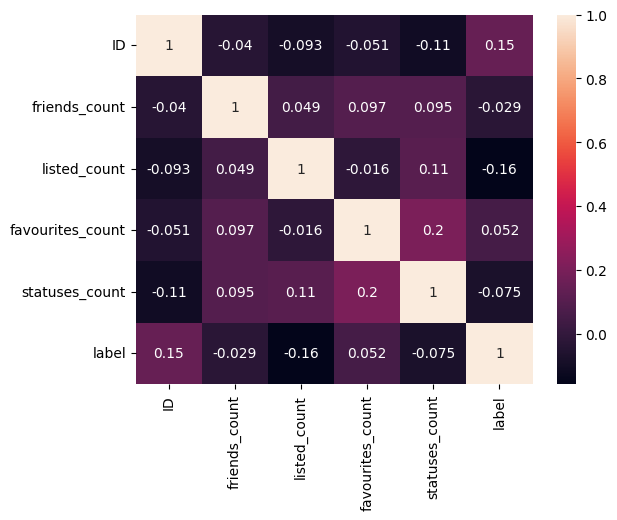

In [93]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

Missing Values identification

In [94]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

tweet 0.0066  % missing values


In [95]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  6


,ID,friends_count,listed_count,favourites_count,statuses_count,label
0,17461978,692,45568,142,9798,0
1,1297437077403885568,44,0,7,0,1
2,17685258,475,3201,953,5518,0
3,15750898,4801,1744,2946,192876,0
4,1659167666,647,44,729,103,1


In [96]:
year_feature = [feature for feature in numerical_features if 'created_at' in feature ]

year_feature

[]

In [97]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

Discrete Variables Count: 1


['label']

In [98]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


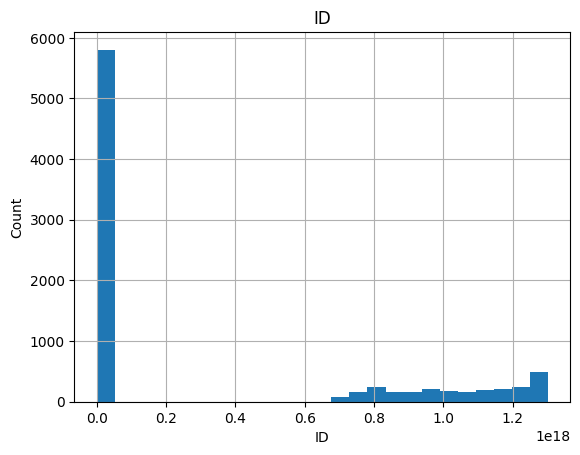

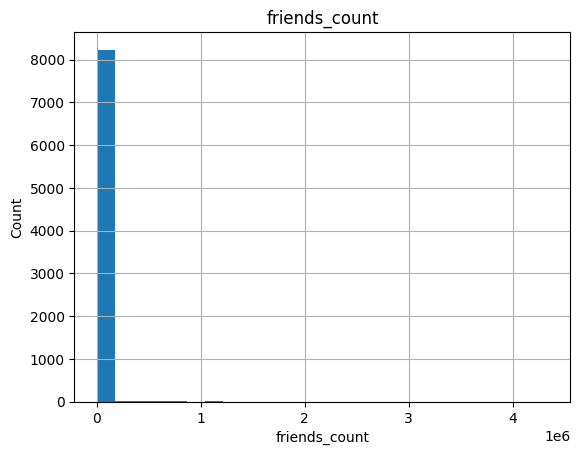

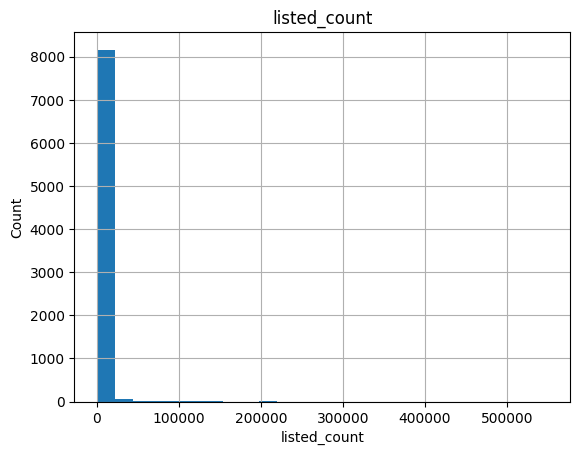

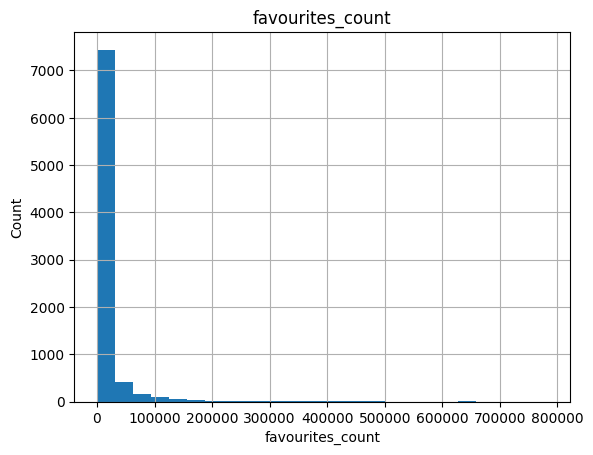

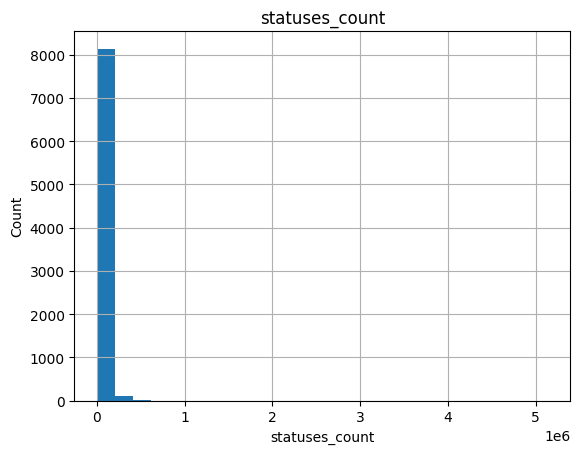

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [101]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['tweet',
 'domain',
 'profile_name',
 'screen_name',
 'location',
 'profile_location',
 'description',
 'url',
 'protected',
 'created_at',
 'utc_offset',
 'time_zone',
 'geo_enabled',
 'verified',
 'lang',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_image_url',
 'profile_image_url_https',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'has_extended_profile',
 'default_profile',
 'default_profile_image',
 'neighbor_follower',
 'neighbor_following']

In [102]:
df[categorical_features].head()

,tweet,domain,profile_name,screen_name,location,profile_location,description,url,protected,created_at,utc_offset,time_zone,geo_enabled,verified,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,neighbor_follower,neighbor_following
0,"[""RT @CarnivalCruise: \ud83c\udf89 Are you rea...","[""Politics"", ""Business"", ""Entertainment""]",SHAQ,SHAQ,"Orlando, FL","""{'id': '55b4f9e5c516e0b6', 'url': 'https://ap...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,False,Tue Nov 18 10:27:25 +0000 2008,None,None,True,True,None,False,False,False,080203,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg....,False,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False,[],[]
1,NaN,"[""Politics""]",Jennifer Fishpaw,JenniferFishpaw,,"""None """,,None,False,Sun Aug 23 07:35:11 +0000 2020,None,None,False,False,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1297437406...,https://pbs.twimg.com/profile_images/129743740...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,"[""170861207"", ""23970102"", ""47293791"", ""2945807...",[]
2,"[""RT @realDonaldTrump: THANK YOU #RNC2020! htt...","[""Politics"", ""Entertainment"", ""Sports""]",Brad Parscale,parscale,Florida,"""None """,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,False,Thu Nov 27 18:47:32 +0000 2008,None,None,True,True,None,False,False,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg....,False,http://pbs.twimg.com/profile_images/1295453225...,https://pbs.twimg.com/profile_images/129545322...,AB2316,FFFFFF,FFFFFF,666666,False,False,False,False,"[""46464108"", ""21536398"", ""18643437"", ""58949002...","[""1275068515666386945"", ""2535843469"", ""1293657..."
3,"[""A family fears they may have been cheated ou...","[""Politics""]",FOX 13 Tampa Bay,FOX13News,"Tampa, FL","""None """,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,False,Wed Aug 06 15:12:10 +0000 2008,None,None,True,True,None,False,False,False,00064A,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg....,False,http://pbs.twimg.com/profile_images/1293193013...,https://pbs.twimg.com/profile_images/129319301...,0B2F8A,FFFFFF,E8EEF0,333333,True,False,False,False,"[""2324715174"", ""24030137"", ""2336676015"", ""1926...","[""855194021458739200"", ""1267566832598290432"", ..."
4,"[""RT @VonteThePlug: Yeah but he ain\u2019t got...","[""Politics""]",Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","""{'id': '5e281c17a74c170f', 'url': 'https://ap...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,False,Sat Aug 10 03:25:35 +0000 2013,None,None,False,False,None,False,False,False,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg....,False,http://pbs.twimg.com/profile_images/1181662400...,https://pbs.twimg.com/profile_images/118166240...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,"[""1628313708"", ""726405625"", ""130868956"", ""2665...","[""893137540185718785"", ""1063858543"", ""26665819..."


In [103]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is tweet and number of categories are 8224
The feature is domain and number of categories are 15
The feature is profile_name and number of categories are 8213
The feature is screen_name and number of categories are 8278
The feature is location and number of categories are 3133
The feature is profile_location and number of categories are 419
The feature is description and number of categories are 7193
The feature is url and number of categories are 4001
The feature is protected and number of categories are 2
The feature is created_at and number of categories are 8277
The feature is utc_offset and number of categories are 1
The feature is time_zone and number of categories are 1
The feature is geo_enabled and number of categories are 2
The feature is verified and number of categories are 2
The feature is lang and number of categories are 1
The feature is contributors_enabled and number of categories are 1
The feature is is_translator and number of categories are 2
The feature

Standardizing variables

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8278.0,3.124649e+17,4.893735e+17,12.0,1.085977e+08,866827243.0,8.185662e+17,1.301791e+18
friends_count,8278.0,6.609915e+03,6.377857e+04,0.0,2.310000e+02,723.0,2.124000e+03,4.339982e+06
listed_count,8278.0,1.504489e+03,9.855073e+03,0.0,0.000000e+00,13.0,2.580000e+02,5.501810e+05
favourites_count,8278.0,1.329748e+04,4.041568e+04,0.0,1.460000e+02,1584.5,9.121250e+03,7.834560e+05
statuses_count,8278.0,2.158684e+04,9.008918e+04,0.0,4.050000e+02,3624.0,1.572975e+04,5.140025e+06
label,8278.0,5.612467e-01,4.962646e-01,0.0,0.000000e+00,1.0,1.000000e+00,1.000000e+00


In [106]:
from sklearn.preprocessing import StandardScaler
to_scale=df[['ID', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count']]
scaler = StandardScaler() 
df_standardized = scaler.fit_transform(to_scale)
df[['ID', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count']] = df_standardized

In [107]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['tweet', 'domain', 'profile_name', 'screen_name', 'location',
       'profile_location', 'description', 'url', 'protected', 'created_at',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'lang',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       'profile_background_image_url_https', 'profile_background_tile',
       'profile_image_url', 'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'neighbor_follower', 'neighbor_following'],
      dtype='object')
Numerical Variables:
['ID', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'label']


ID
Skew : 1.01


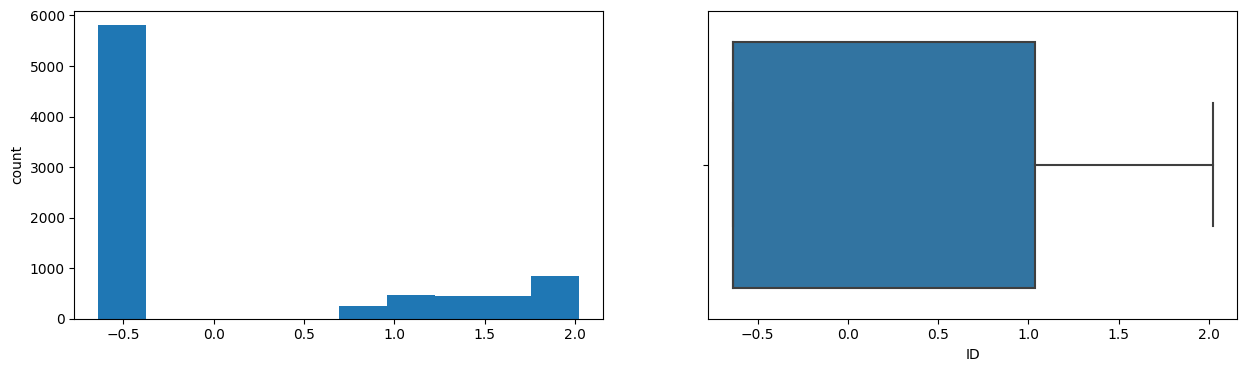

friends_count
Skew : 43.22


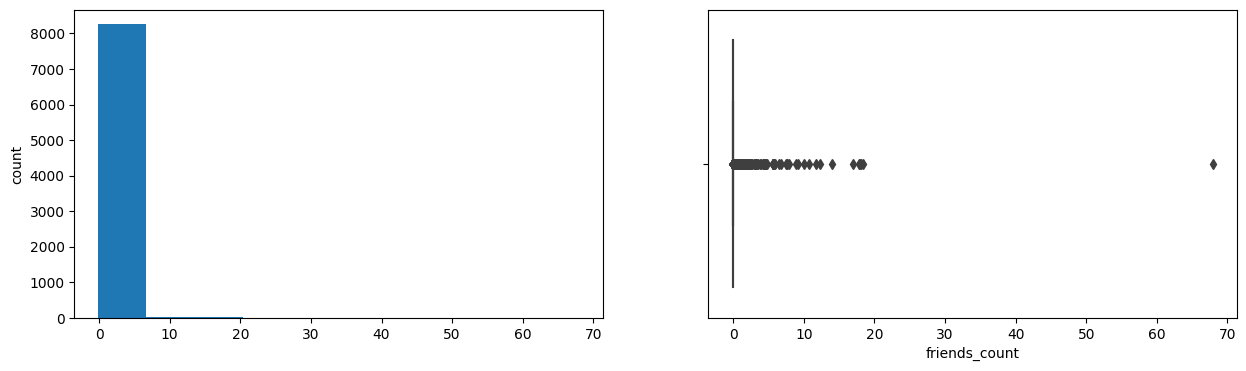

listed_count
Skew : 27.45


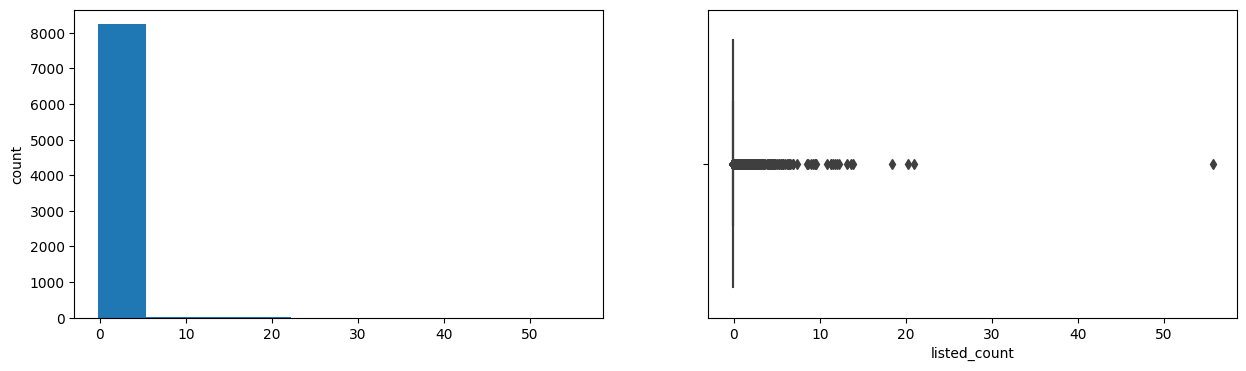

favourites_count
Skew : 8.03


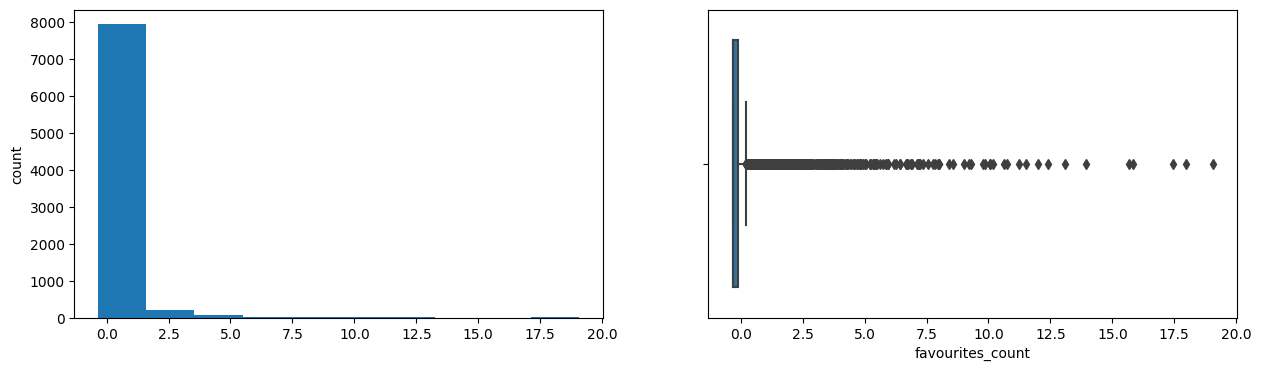

statuses_count
Skew : 30.39


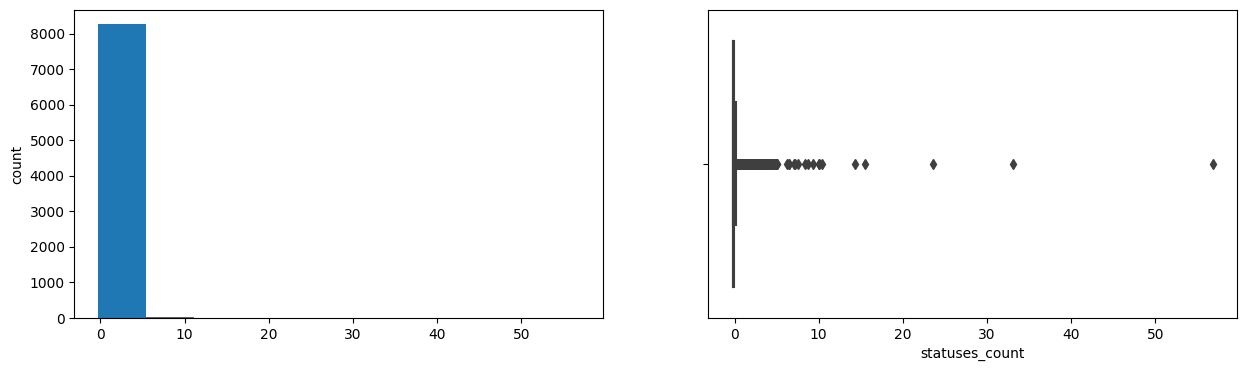

label
Skew : -0.25


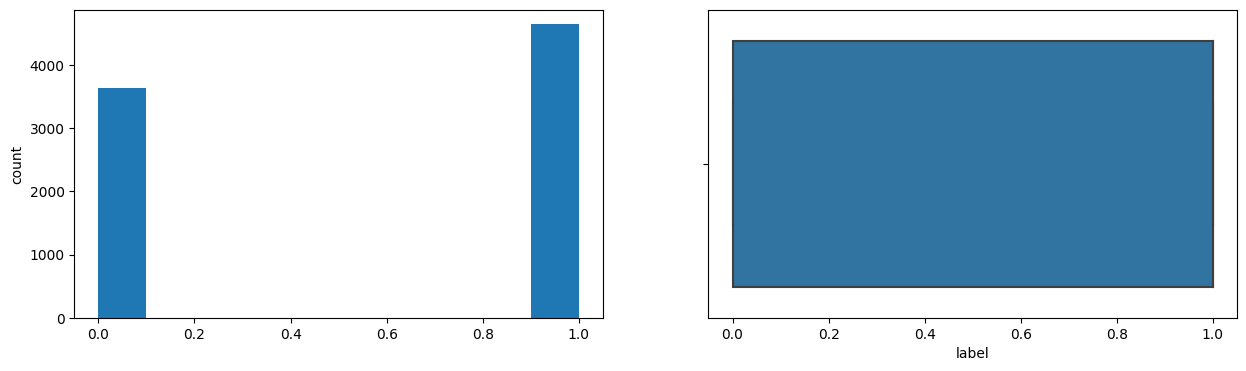

In [108]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Log Transformation

In [109]:
numerical_variables = df.select_dtypes(include=['float64', 'int64'])

def remove_outliers(dataframe, column, threshold=1.5): 
    Q1 = dataframe[column].quantile(0.25) 
    Q3 = dataframe[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - threshold * IQR 
    upper_bound = Q3 + threshold * IQR 
    outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound) 
    return dataframe[~outliers]

for column in numerical_variables: 
    df = remove_outliers(df, column)


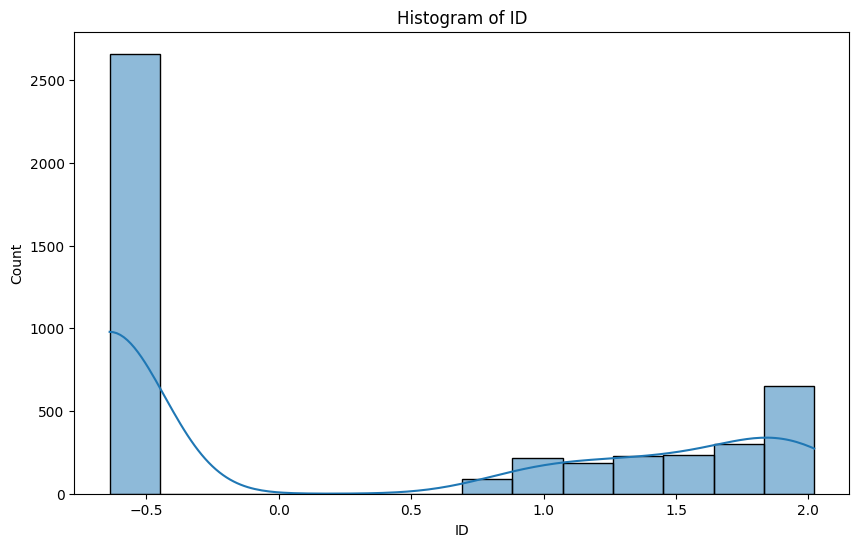

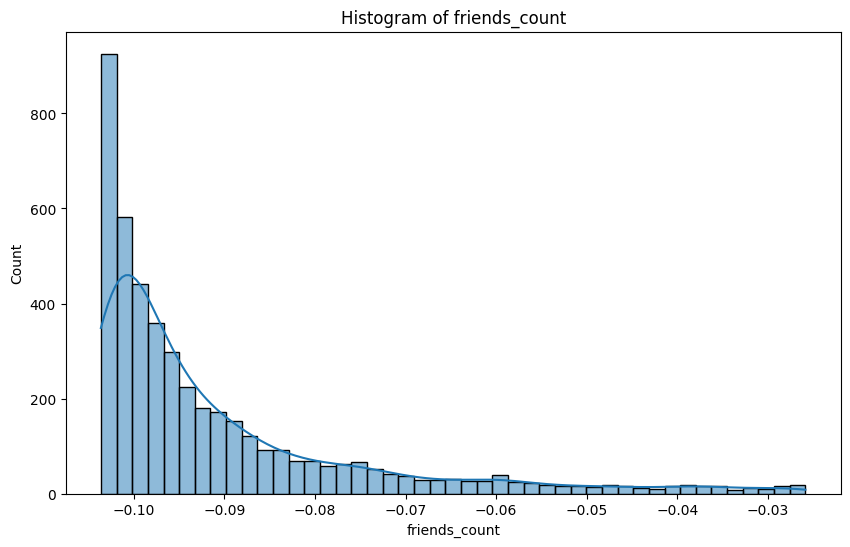

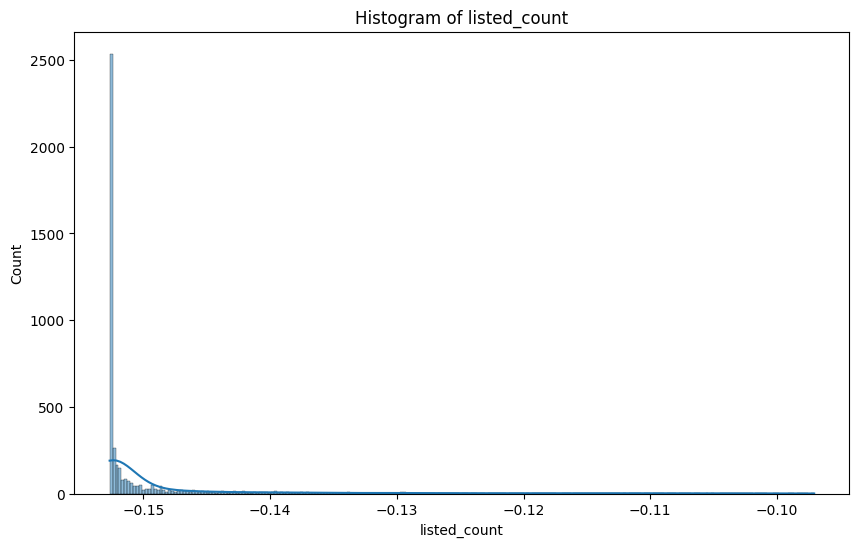

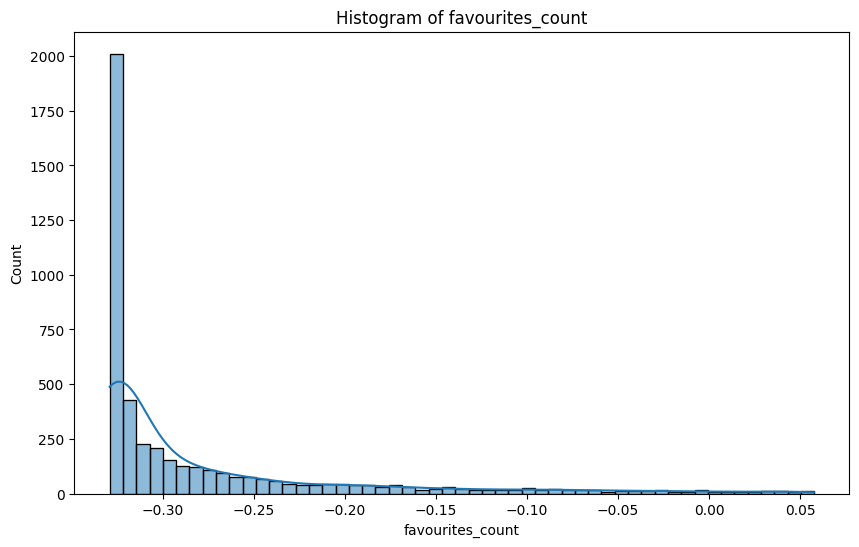

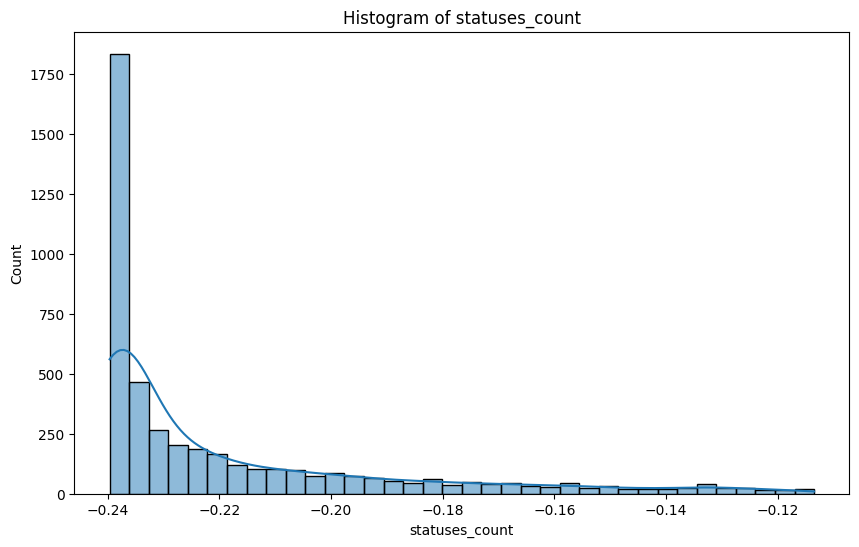

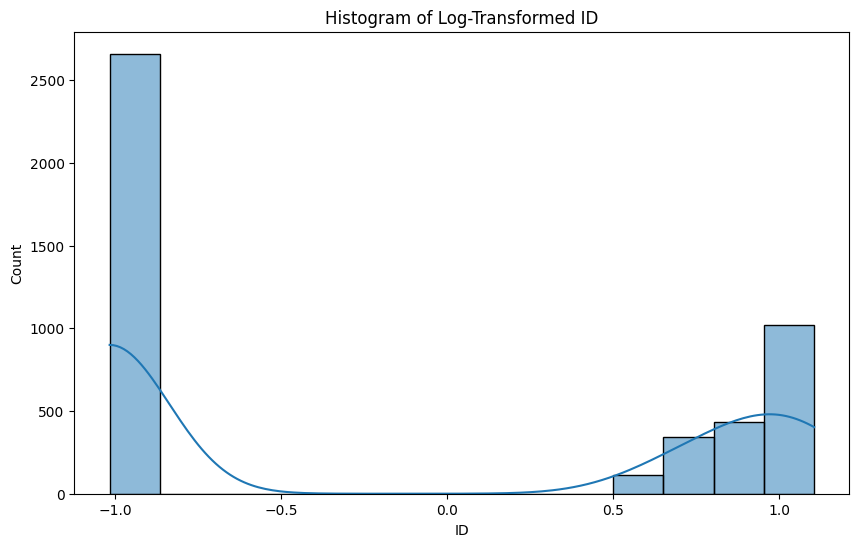

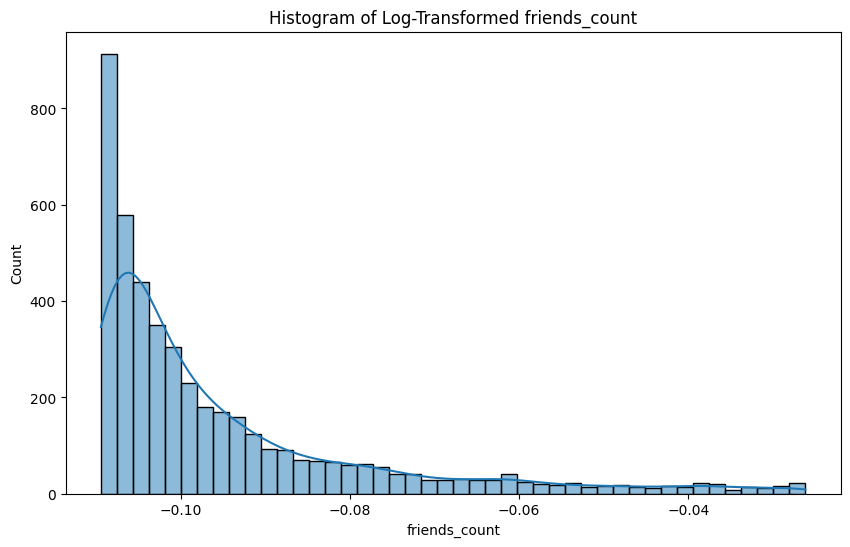

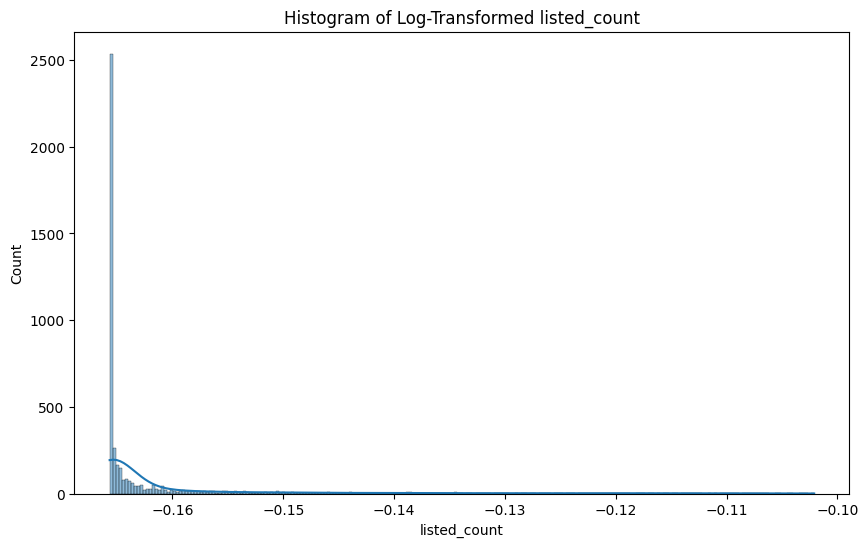

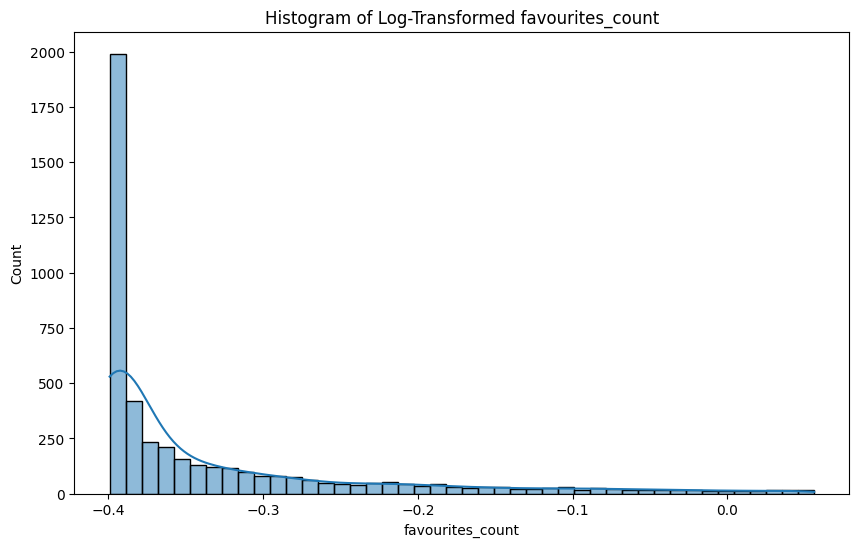

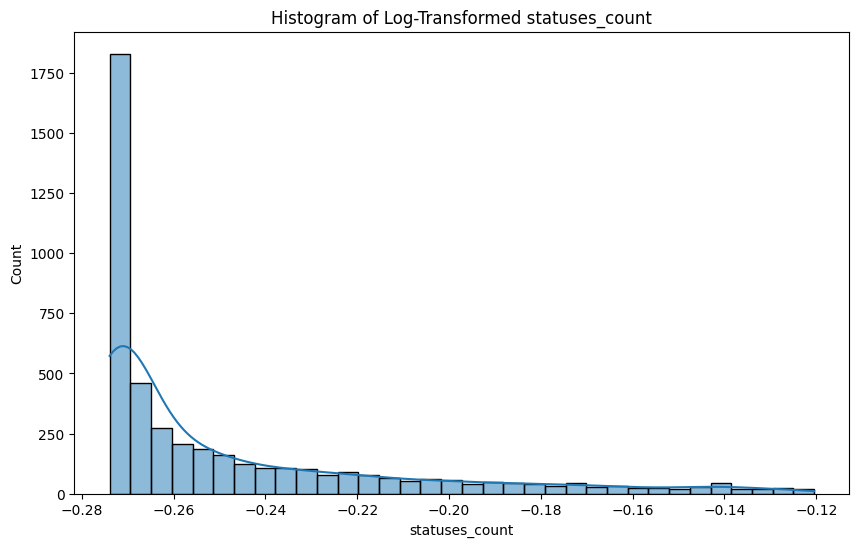

In [110]:
numerical_variables = df.select_dtypes(include=['float64', 'int64'])

skewness = numerical_variables.apply(lambda x: x.skew())

right_skewed_variables = skewness[skewness > 0].index

# filter variables that are right-skewed (skewness > 0) right_skewed_variables = skewness[skewness > 0].index
for variable in right_skewed_variables: 
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variable], kde=True) 
    plt.title(f'Histogram of {variable}') 
    plt.show()
    
df[right_skewed_variables] = np.log1p(df[right_skewed_variables])

# log transform the right-skewed variables df[right_skewed_variables] = np.log1p(df[right_skewed_variables])
for variable in right_skewed_variables: 
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variable], kde=True) 
    plt.title(f'Histogram of Log-Transformed {variable}') 
    plt.show()